In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv(r"/content/test (2).csv", nrows=1000)
data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?
1,1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?
2,2,What but is the best way to send money from China to the US?,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [ ]:
#text cleaning
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)


179

In [ ]:
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy
import numpy as np
nltk.download('stopwords')
from nltk import FreqDist
import gensim
from gensim import corpora
import os.path
import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


data = data[["question1","question2"]]
data["question1"] = data["question1"].astype(str)
data["question2"] = data["question2"].astype(str)
data.head()

,question1,question2
0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?
1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?
2,What but is the best way to send money from China to the US?,What you send money to China?
3,Which food not emulsifiers?,What foods fibre?
4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [ ]:
data["q1_lower"] = data["question1"].str.lower()
data["q2_lower"] = data["question2"].str.lower()
data.head()

,question1,question2,q1_lower,q2_lower
0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?,how does the surface pro himself 4 compare with ipad pro?,why did microsoft choose core m3 and not core i3 home surface pro 4?
1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?,should i have a hair transplant at age 24? how much would it cost?,how much cost does hair transplant require?
2,What but is the best way to send money from China to the US?,What you send money to China?,what but is the best way to send money from china to the us?,what you send money to china?
3,Which food not emulsifiers?,What foods fibre?,which food not emulsifiers?,what foods fibre?
4,"How ""aberystwyth"" start reading?",How their can I start reading?,"how ""aberystwyth"" start reading?",how their can i start reading?


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

calculate the words

In [ ]:
data['word_count'] = data['question1'].apply(lambda x: len(str(x).split(" ")))
data['word_count'] = data['question2'].apply(lambda x: len(str(x).split(" ")))
data[['question1','question2','word_count']].head()

,question1,question2,word_count
0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?,14
1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?,7
2,What but is the best way to send money from China to the US?,What you send money to China?,6
3,Which food not emulsifiers?,What foods fibre?,3
4,"How ""aberystwyth"" start reading?",How their can I start reading?,6


In [ ]:

# remove stopwords from the  columns
from nltk.corpus import stopwords
stop = stopwords.words('english')
data[''] = data['question1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data[''] = data['question2'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

data['question1'].head()

0             How does the Surface Pro himself 4 compare with iPad Pro?
1    Should I have a hair transplant at age 24? How much would it cost?
2          What but is the best way to send money from China to the US?
3                                           Which food not emulsifiers?
4                                      How "aberystwyth" start reading?
Name: question1, dtype: object

In [ ]:
data['question2'].head()

0    Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?
1                             How much cost does hair transplant require?
2                                           What you send money to China?
3                                                       What foods fibre?
4                                          How their can I start reading?
Name: question2, dtype: object

In [ ]:
#common word removal
from collections import Counter
cnt = Counter()
for text in data["question1"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('the', 400),
 ('What', 325),
 ('a', 280),
 ('is', 277),
 ('How', 254),
 ('I', 238),
 ('to', 231),
 ('in', 214),
 ('of', 178),
 ('and', 159)]

In [ ]:
from collections import Counter
cnt1 = Counter()
for text in data["question2"].values:
    for word in text.split():
        cnt1[word] += 1
        
cnt1.most_common(10)

[('the', 399),
 ('What', 334),
 ('I', 279),
 ('a', 272),
 ('How', 247),
 ('in', 239),
 ('is', 236),
 ('to', 227),
 ('of', 204),
 ('do', 153)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

data["question1"] = data["question1"].apply(lambda text: remove_freqwords(text))
data["question2"] = data["question2"].apply(lambda text: remove_freqwords(text))
data.head()

,question1,question2,q1_lower,q2_lower,word_count,
0,does Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 not core i3 home Surface Pro 4?,how does the surface pro himself 4 compare with ipad pro?,why did microsoft choose core m3 and not core i3 home surface pro 4?,14,Why Microsoft choose core m3 core i3 home Surface Pro 4?
1,Should have hair transplant at age 24? much would it cost?,much cost does hair transplant require?,should i have a hair transplant at age 24? how much would it cost?,how much cost does hair transplant require?,7,How much cost hair transplant require?
2,but best way send money from China US?,you send money China?,what but is the best way to send money from china to the us?,what you send money to china?,6,What send money China?
3,Which food not emulsifiers?,foods fibre?,which food not emulsifiers?,what foods fibre?,3,What foods fibre?
4,"""aberystwyth"" start reading?",their can start reading?,"how ""aberystwyth"" start reading?",how their can i start reading?,6,How I start reading?


In [ ]:
#rare words removal


freq1= pd.Series(' '.join(data['question1']).split()).value_counts()[-10:]

freq1

Unbox               1
therapy             1
gadgets             1
everyday            1
reviewing?          1
Millionaires?       1
flat?               1
css                 1
actors/actresses    1
spend               1
dtype: int64

In [ ]:
freq2 = pd.Series(' '.join(data['question2']).split()).value_counts()[-10:]
freq2

preparing      1
AC             1
3-star         1
everyone       1
bill?          1
Vision         1
(eyesight):    1
eyes           1
3D?            1
MNNIT?         1
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [ ]:
import warnings
warnings.filterwarnings
# remove unwanted characters, numbers and symbols
data['question1'] = data['question1'].str.replace("[^a-zA-Z#]", " ")
data['question2'] = data['question2'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [ ]:
data['question1'] = data['question1'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
data['question2'] = data['question2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
data['question1'].head()

0     does Surface Pro himself compare with iPad Pro
1    Should have hair transplant age much would cost
2                 but best way send money from China
3                         Which food not emulsifiers
4                          aberystwyth start reading
Name: question1, dtype: object

In [ ]:
data['question2'].head()

0    Why did Microsoft choose core not core home Surface Pro
1                     much cost does hair transplant require
2                                       you send money China
3                                                foods fibre
4                                    their can start reading
Name: question2, dtype: object

In [ ]:
# remove stopwords from the review
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['question1'] = data['question1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['question1'].head()

0                  Surface Pro compare iPad Pro
1    Should hair transplant age much would cost
2                     best way send money China
3                        Which food emulsifiers
4                     aberystwyth start reading
Name: question1, dtype: object

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['question2'] = data['question1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['question2'].head()

0                  Surface Pro compare iPad Pro
1    Should hair transplant age much would cost
2                     best way send money China
3                        Which food emulsifiers
4                     aberystwyth start reading
Name: question2, dtype: object

In [ ]:
# function to remove stopwords
def remove_stopwords(df):
    data = " ".join([i for i in rev if i not in stop_words])
    return data

In [ ]:
data = data[ data ['question1'].notnull()]
data = data[ data ['question2'].notnull()]
data.head(10)

,question1,question2,q1_lower,q2_lower,word_count,
0,Surface Pro compare iPad Pro,Surface Pro compare iPad Pro,how does the surface pro himself 4 compare with ipad pro?,why did microsoft choose core m3 and not core i3 home surface pro 4?,14,Why Microsoft choose core m3 core i3 home Surface Pro 4?
1,Should hair transplant age much would cost,Should hair transplant age much would cost,should i have a hair transplant at age 24? how much would it cost?,how much cost does hair transplant require?,7,How much cost hair transplant require?
2,best way send money China,best way send money China,what but is the best way to send money from china to the us?,what you send money to china?,6,What send money China?
3,Which food emulsifiers,Which food emulsifiers,which food not emulsifiers?,what foods fibre?,3,What foods fibre?
4,aberystwyth start reading,aberystwyth start reading,"how ""aberystwyth"" start reading?",how their can i start reading?,6,How I start reading?
5,two wheeler insurance Bharti Axa insurance,two wheeler insurance Bharti Axa insurance,how are the two wheeler insurance from bharti axa insurance?,i admire i am considering of buying insurance from them,10,I admire I considering buying insurance
6,reduce belly fat diet,reduce belly fat diet,how can i reduce my belly fat through a diet?,how can i reduce my lower belly fat in one month?,11,How I reduce lower belly fat one month?
7,scrapping rupee notes RBI planning fight issue black money,scrapping rupee notes RBI planning fight issue black money,"by scrapping the 500 and 1000 rupee notes, how is rbi planning to fight against issue black money?",how will the recent move to declare 500 and 1000 denomination lewin illegal will curb black money?,17,How recent move declare 500 1000 denomination lewin illegal curb black money?
8,best books time,best books time,what are the how best books of all time?,what are some of the military history books of all time?,11,What military history books time?
9,After years old boy sex years old girl consent anything wrong,After years old boy sex years old girl consent anything wrong,"after 12th years old boy and i had sex with a 12 years old girl, with her consent. is there anything wrong?",can a 14 old guy date a 12 year old girl?,11,Can 14 old guy date 12 year old girl?


In [ ]:
!python3 -m spacy download en 

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 13.7 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatization(data, tags=['NOUN', 'ADJ']):
    output = []
    for sent in data:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [ ]:
from nltk.tokenize import sent_tokenize 
tokenized_reviews = pd.Series(data['question1']).apply(lambda x: x.split())


In [ ]:
tokenized_reviews

0                                     [Surface, Pro, compare, iPad, Pro]
1                     [Should, hair, transplant, age, much, would, cost]
2                                        [best, way, send, money, China]
3                                             [Which, food, emulsifiers]
4                                          [aberystwyth, start, reading]
                                     ...                                
995         [RAU, IAS, study, circle, Bangalore, branch, UPSC, coaching]
996                    [NFL, try, kick, field, goal, happens, try, miss]
997    [campus, life, Thomas, College, Engineering, Technology, Kolkata]
998                                                [earn, money, prefer]
999                                      [would, like, spend, last, day]
Name: question1, Length: 1000, dtype: object

In [ ]:
from nltk.tokenize import sent_tokenize 
tokenized_review1 = pd.Series(data['question2']).apply(lambda x: x.split())
tokenized_review1

0                                     [Surface, Pro, compare, iPad, Pro]
1                     [Should, hair, transplant, age, much, would, cost]
2                                        [best, way, send, money, China]
3                                             [Which, food, emulsifiers]
4                                          [aberystwyth, start, reading]
                                     ...                                
995         [RAU, IAS, study, circle, Bangalore, branch, UPSC, coaching]
996                    [NFL, try, kick, field, goal, happens, try, miss]
997    [campus, life, Thomas, College, Engineering, Technology, Kolkata]
998                                                [earn, money, prefer]
999                                      [would, like, spend, last, day]
Name: question2, Length: 1000, dtype: object

In [ ]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['Should', 'hair', 'transplant', 'age', 'much', 'would', 'cost']


7

In [ ]:
print(tokenized_review1[1])
len(tokenized_review1[1])

['Should', 'hair', 'transplant', 'age', 'much', 'would', 'cost']


7

In [ ]:
question1_2 = lemmatization(tokenized_reviews)
print(question1_2[1])

['hair', 'transplant', 'age']


In [ ]:
len(question1_2[1])

3

In [ ]:
set(tokenized_reviews[1]) - set(question1_2[1])

{'Should', 'cost', 'much', 'would'}

In [ ]:
reviews_3 = []
for i in range(len(question1_2)):
    reviews_3.append(' '.join(question1_2[i]))

In [ ]:
data[('question1')] = reviews_3

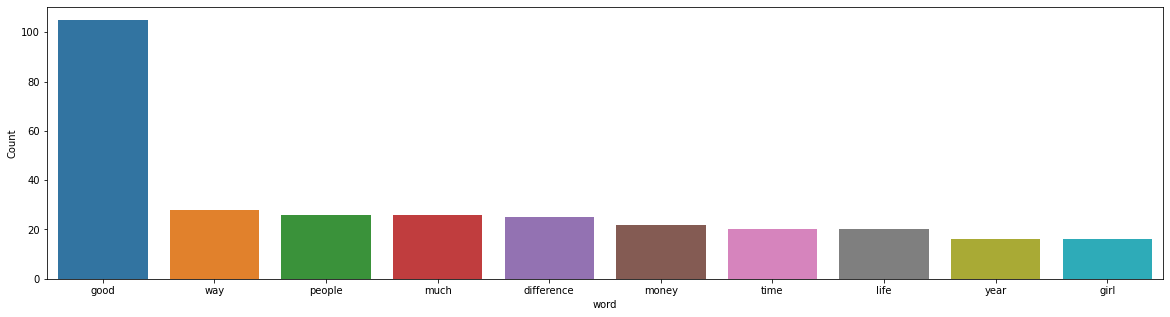

In [ ]:
freq_words(data['question1'], 10)

In [ ]:
#LDA
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(question1_2)

In [ ]:
#Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in question1_2]

In [ ]:
#Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [ ]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=10, 
                random_state=100,
                chunksize=1000,
                passes=50)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
lda_model.print_topics()

[(0,
  '0.025*"good" + 0.024*"time" + 0.020*"people" + 0.018*"many" + 0.014*"possible" + 0.012*"test" + 0.010*"company" + 0.010*"travel" + 0.008*"story" + 0.008*"great"'),
 (1,
  '0.027*"question" + 0.021*"year" + 0.020*"old" + 0.012*"good" + 0.011*"book" + 0.011*"work" + 0.011*"math" + 0.009*"job" + 0.008*"people" + 0.008*"much"'),
 (2,
  '0.025*"life" + 0.014*"app" + 0.011*"people" + 0.009*"credit" + 0.007*"page" + 0.007*"easy" + 0.007*"technology" + 0.007*"chance" + 0.005*"download" + 0.005*"beginner"'),
 (3,
  '0.030*"good" + 0.019*"difference" + 0.017*"girl" + 0.015*"course" + 0.010*"place" + 0.006*"friend" + 0.006*"video" + 0.006*"glass" + 0.006*"watch" + 0.006*"car"'),
 (4,
  '0.024*"thing" + 0.021*"much" + 0.015*"food" + 0.011*"difference" + 0.011*"different" + 0.009*"cost" + 0.009*"indian" + 0.007*"research" + 0.007*"datum" + 0.007*"tall"'),
 (5,
  '0.019*"well" + 0.014*"movie" + 0.012*"account" + 0.012*"bank" + 0.008*"free" + 0.008*"life" + 0.007*"experience" + 0.007*"number"

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [ ]:
#To visualize our topics in a 2-dimensional space we will use the pyLDAvis library. 
#This visualization is interactive in nature and displays topics along with the most relevant words.

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.157104 -0.061512       1        1  11.972028
0      0.092725  0.121363       2        1  10.897340
7     -0.032578 -0.038566       3        1  10.896181
3     -0.002359  0.091829       4        1  10.666358
4     -0.110691 -0.001476       5        1  10.201177
1      0.014583 -0.090593       6        1   9.959722
2     -0.096084  0.085936       7        1   9.336630
5     -0.074033 -0.083890       8        1   9.311462
6      0.012131 -0.054675       9        1   9.184428
9      0.039202  0.031585      10        1   7.574675, topic_info=           Term       Freq      Total Category  logprob  loglift
5           way  19.000000  19.000000  Default  30.0000  30.0000
3          good  71.000000  71.000000  Default  29.0000  29.0000
4         money  15.000000  15.000000  Default  28.0000  28.0000
93     question   8.000000   8.000000  Default  27.0000  27.0000
78        thing   8.000000   8.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
27      service   1.326610   6.629470  Topic10  -5.1697   0.9715
101         job   1.326593   8.617823  Topic10  -5.1697   0.7091
172        rate   1.326587   4.612103  Topic10  -5.1697   1.3343
178      number   1.326574   7.937553  Topic10  -5.1697   0.7914
54   difference   1.326567  17.380306  Topic10  -5.1697   0.0076

[538 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
299       7  0.751257  Fiverr
316       3  0.743693   India
1274      4  0.743794   Montr
141       5  0.372815    able
141       6  0.372815    able
...     ...       ...     ...
315       9  0.135397   world
25        3  0.087706    year
25        5  0.175412    year
25        6  0.613942    year
25        8  0.087706    year

[874 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 8, 4, 5, 2, 3, 6, 7, 10])

LSA done on column question2

In [ ]:
#LSA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [ ]:
tokenized_review1

0                                     [Surface, Pro, compare, iPad, Pro]
1                     [Should, hair, transplant, age, much, would, cost]
2                                        [best, way, send, money, China]
3                                             [Which, food, emulsifiers]
4                                          [aberystwyth, start, reading]
                                     ...                                
995         [RAU, IAS, study, circle, Bangalore, branch, UPSC, coaching]
996                    [NFL, try, kick, field, goal, happens, try, miss]
997    [campus, life, Thomas, College, Engineering, Technology, Kolkata]
998                                                [earn, money, prefer]
999                                      [would, like, spend, last, day]
Name: question2, Length: 1000, dtype: object

In [ ]:
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_review1)):
    t = ' '.join(tokenized_review1[i])
    detokenized_doc.append(t)

tokenized_review1['clean_doc'] = detokenized_doc

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(tokenized_review1['clean_doc'])

X.shape # check shape of the document-term matrix

(1000, 1000)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

20

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
best
 
way
 
india
 
money
 
website
 
learn
 
english
 
Topic 1: 
good
 
difference
 
people
 
like
 
make
 
money
 
quora
 
Topic 2: 
difference
 
possible
 
time
 
money
 
travel
 
like
 
quora
 
Topic 3: 
like
 
people
 
life
 
day
 
know
 
money
 
make
 
Topic 4: 
time
 
possible
 
travel
 
way
 
like
 
sex
 
people
 
Topic 5: 
india
 
time
 
better
 
possible
 
conducted
 
want
 
travel
 
Topic 6: 
life
 
learn
 
way
 
english
 
money
 
start
 
like
 
Topic 7: 
way
 
money
 
english
 
make
 
people
 
earn
 
india
 
Topic 8: 
money
 
make
 
like
 
using
 
time
 
start
 
website
 
Topic 9: 
mean
 
life
 
make
 
learn
 
start
 
quora
 
money
 
Topic 10: 
mean
 
like
 
world
 
quora
 
earn
 
women
 
want
 
Topic 11: 
learn
 
start
 
language
 
want
 
computer
 
know
 
movie
 
Topic 12: 
know
 
girl
 
day
 
does
 
want
 
like
 
phone
 
Topic 13: 
better
 
ios
 
sleep
 
batman
 
cse
 
watch
 
learn
 
Topic 14: 
food
 
eat
 
different
 
examples
 
people
 
does
 
start
 
Topic

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
